# Bad efficiency case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import norm

## 単純な重点サンプリングの例

In [2]:
a = 5.0

In [3]:
f = norm.pdf
h = lambda x: x > a
y = lambda x: h(x) * f(x)

## scipy.integrateでの積分

In [4]:
I1 = scipy.integrate.quad(f, a, np.inf)[0]
I2 = scipy.integrate.quad(y, -np.inf, np.inf)[0]
print('scipy.integrate:',I1, I2)

scipy.integrate: 2.8665157035203983e-07 2.866527562360824e-07


## 普通のモンテカルロ積分の場合
- サンプルxを標準正規分布から生成しているため殆どのサンプルが5より小さい範囲からしか生成されない
- そのためh(x)が0となってします

In [6]:
N = 1000

In [7]:
x = norm.rvs(size=N)
I = np.mean(h(x))
print("normal monte carlo integration:", I)

normal monte carlo integration: 0.0


## グラフ描画

In [8]:
plt.subplot(211)
ix = np.arange(-5, 15, 0.01)
plt.plot(ix, f(ix), label='f(x)')
plt.plot(ix, h(ix), label='h(x)')
plt.xlim((-5, 15))
plt.ylim((0, 2))
plt.legend(loc='best')

## 被積分関数yの値がある部分をズームインして表示

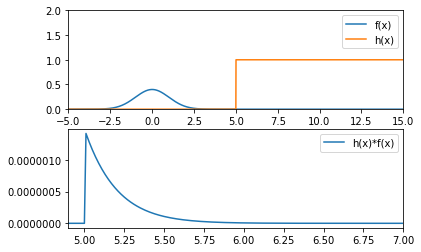

In [9]:
plt.subplot(212)
plt.plot(ix, y(ix), label='h(x)*f(x)')
plt.xlim((4.9, 7))
plt.legend(loc='best')
plt.show()